<a href="https://colab.research.google.com/github/xyze142857/Environment-Setups-/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pystan~=2.14
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 138 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638449 sha256=886def7b904d0a14d9383c89cf7418755850083ce2cf92ca4fdff9a3e1e8e035
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [6]:
import pandas as pd
import numpy as np
import fbprophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
df = pd.read_csv(url, parse_dates=['Date'], date_parser=pd.to_datetime)
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


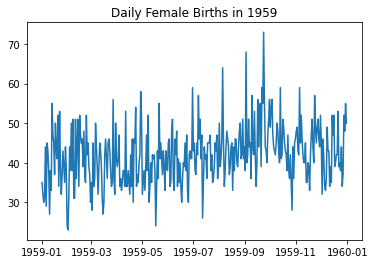

In [8]:
plt.plot(df['ds'], df['y']);
plt.title('Daily Female Births in 1959');

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    m = fbprophet.Prophet(yearly_seasonality=True, daily_seasonality=False, 
                          changepoint_range=0.9, 
                          changepoint_prior_scale=0.5,
                          seasonality_mode='multiplicative')
    m.fit(df);

In [10]:
future = m.make_future_dataframe(periods=50, freq='d')
forecast = m.predict(future)

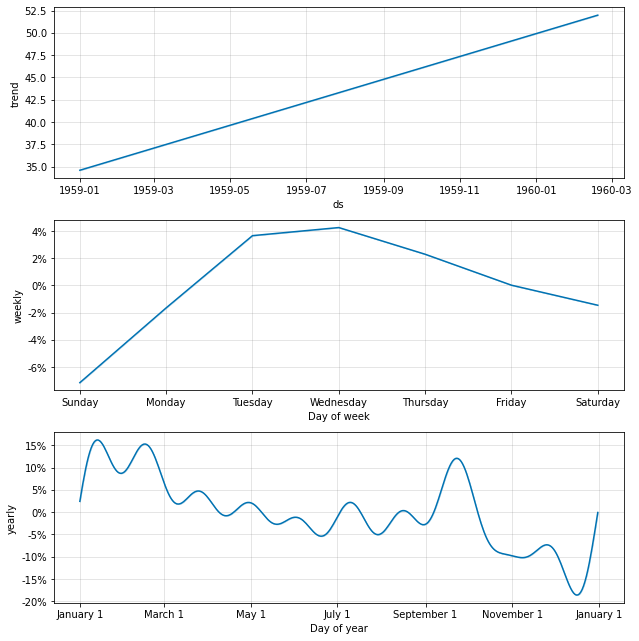

In [11]:
m.plot_components(forecast);

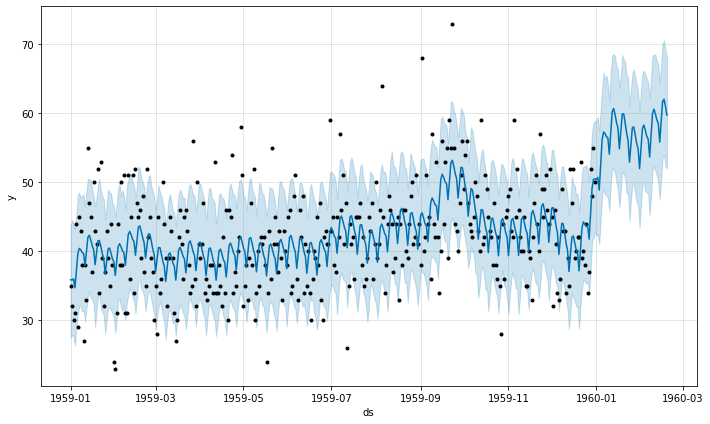

In [12]:
m.plot(forecast);

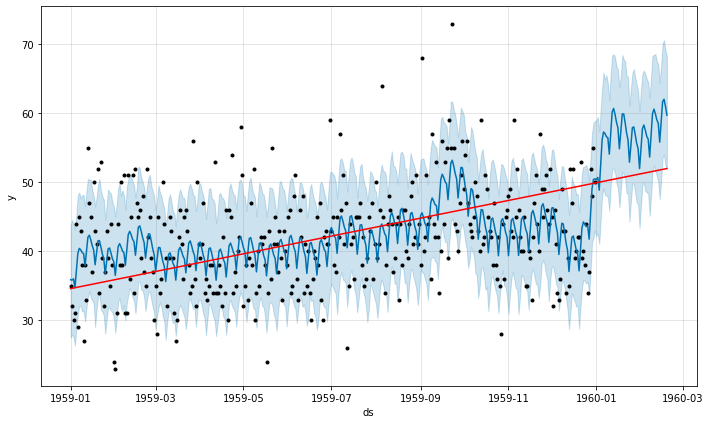

In [13]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast);